In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv("auto-mpg.data",header=None,sep='\s+',na_values="?")
#print(df.head())


In [16]:
#print(df.nunique())
'''for i in df.columns:
    print(np.unique(df[i]))'''
#print(df.isna().sum())
from sklearn.impute import SimpleImputer
df[3]=SimpleImputer().fit_transform(df[3].values.reshape(-1,1))
#print(df.isna().sum())
from sklearn.preprocessing import LabelEncoder
df[8]=LabelEncoder().fit_transform(df[8])
print(df.head())

      0  1      2      3       4     5   6  7    8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1   49
1  15.0  8  350.0  165.0  3693.0  11.5  70  1   36
2  18.0  8  318.0  150.0  3436.0  11.0  70  1  231
3  16.0  8  304.0  150.0  3433.0  12.0  70  1   14
4  17.0  8  302.0  140.0  3449.0  10.5  70  1  161


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

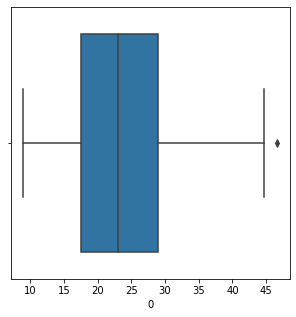

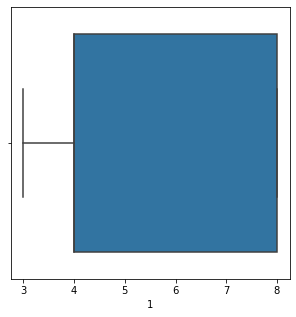

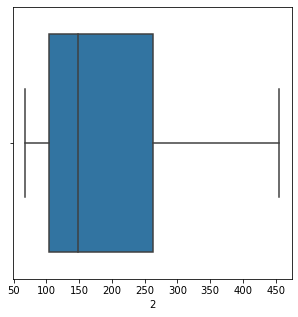

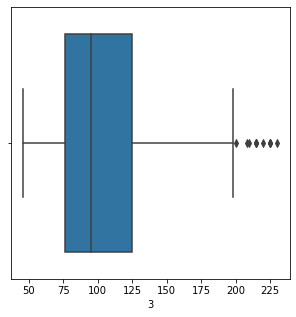

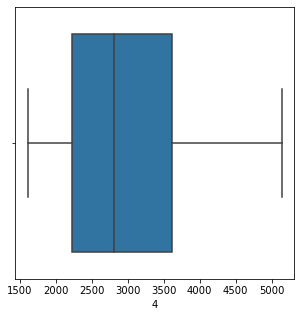

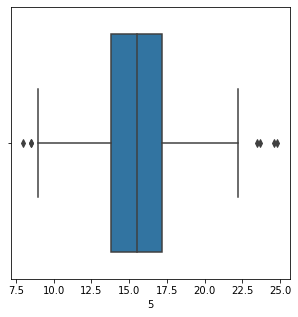

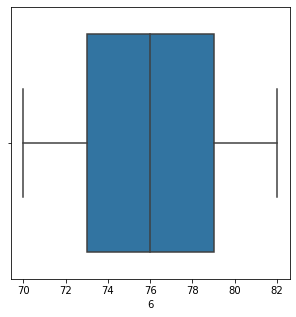

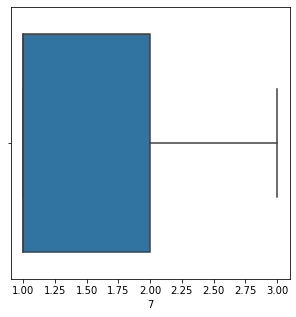

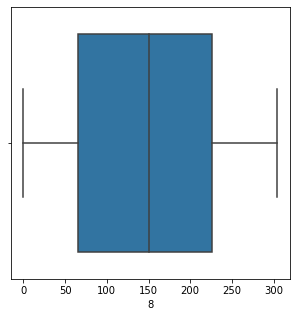

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    plt.subplots(figsize=(5,5))
    sns.boxplot(df[i])

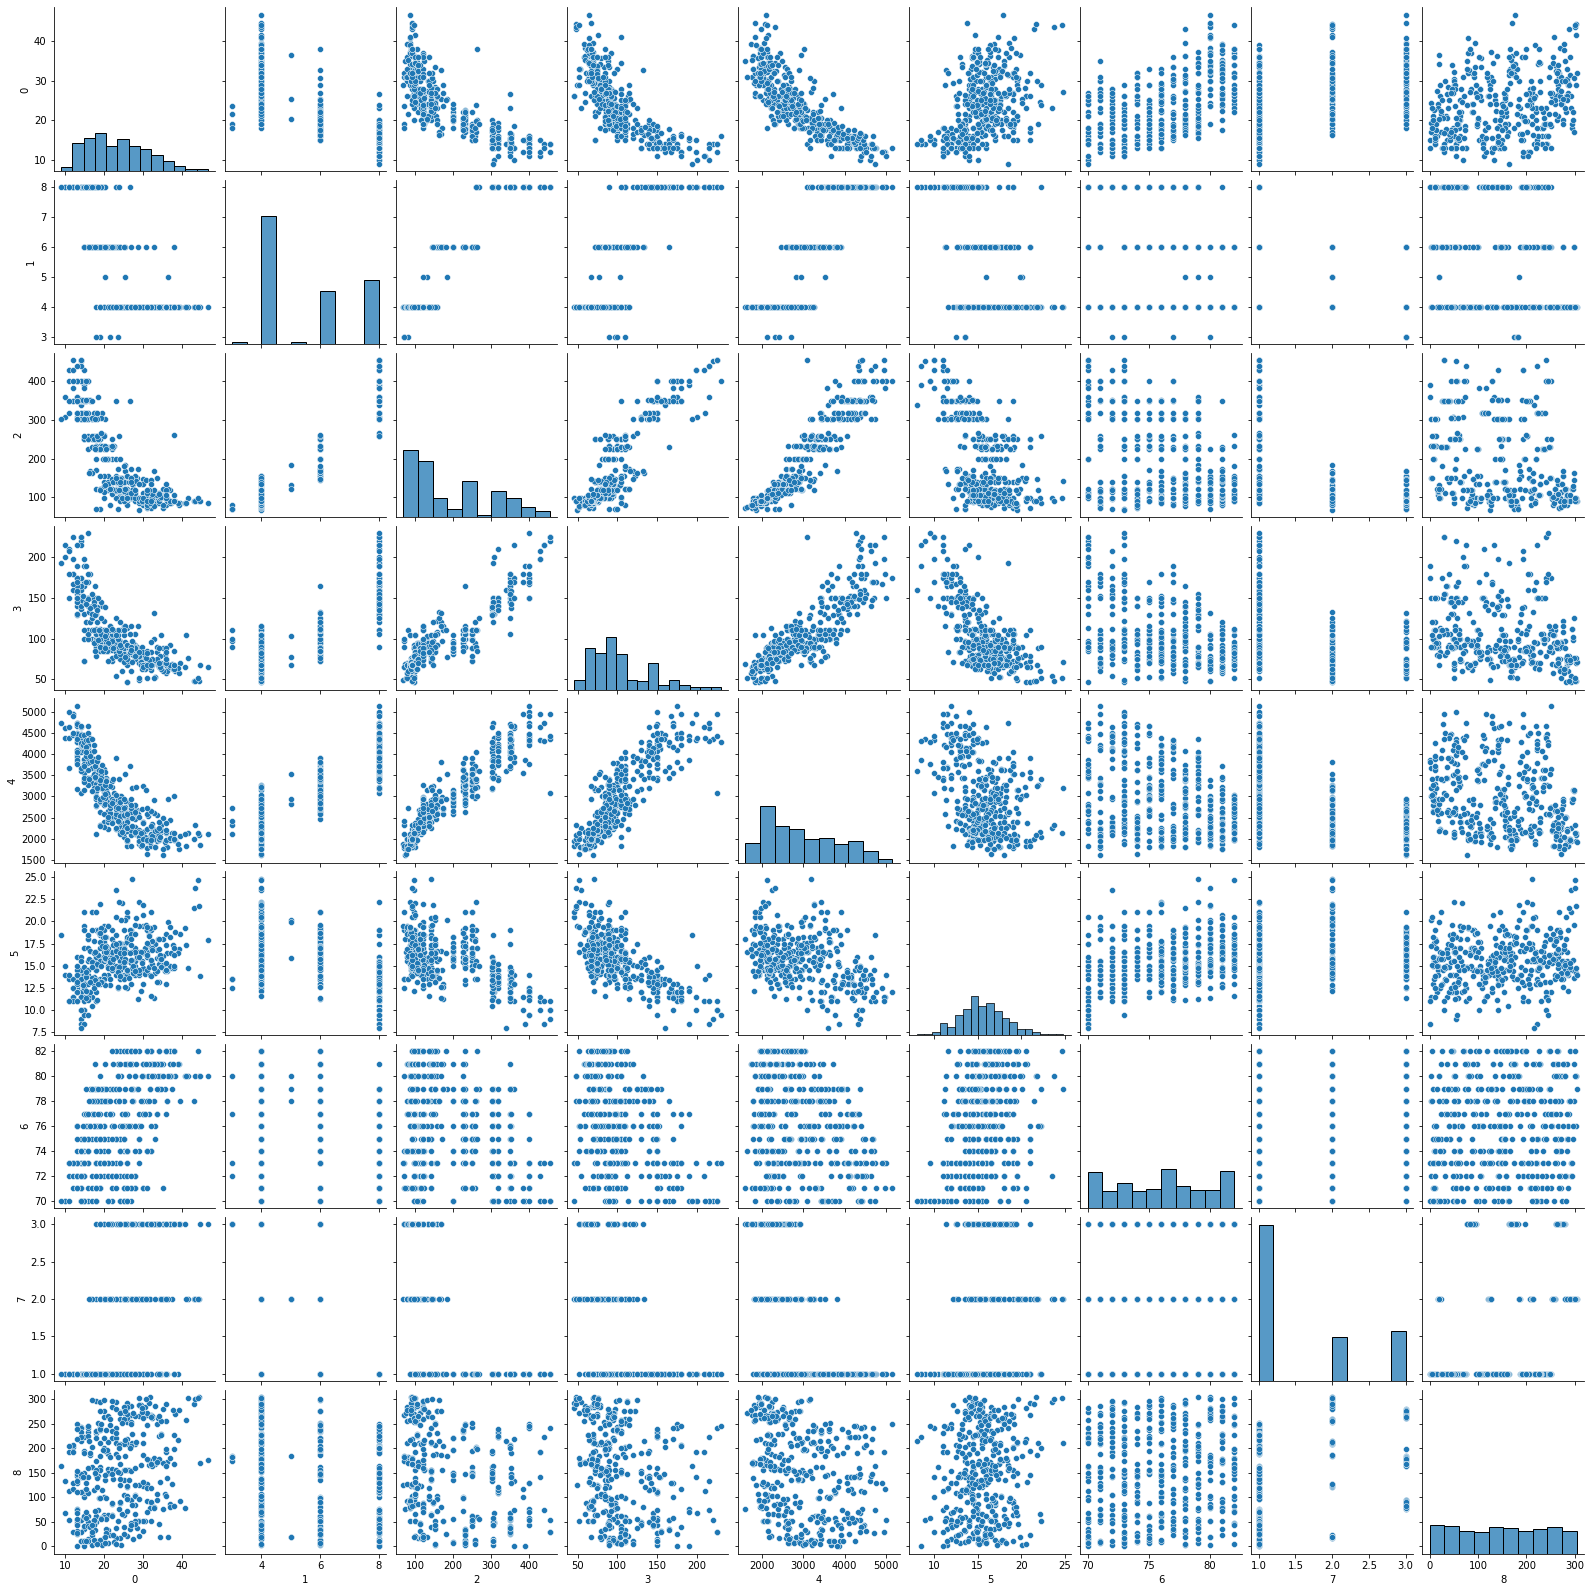

In [24]:
sns.pairplot(df[df.columns])

(278, 1) (120, 1)
0.12648560638421913 0.13184376271952014


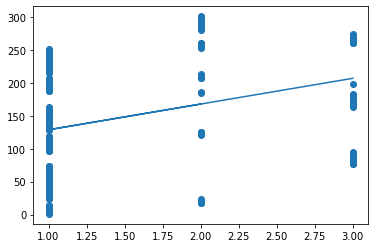

In [32]:
#sns.heatmap(np.corrcoef(df.values.T),annot=True)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df[7].values.reshape(-1,1),
                                          df[8],test_size=0.3)
print(xtrain.shape, xtest.shape)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
train=lr.predict(xtrain)
test=lr.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytrain,train),r2_score(ytest,test))
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,train)
plt.show()